# **STUDENTS RESULT PREDICTION**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('students.csv')
data.head()

,Student_ID,Previous_Exam_Score,Subject1_Score,Subject2_Score,Attendance,Study_Hours,Participation,Homework_Completion,Teacher_Feedback,Family_Support,Socioeconomic_Background,Pass_Indicator
0,1,80,75,85,90,25,80,95,Positive,High,Good,1.0
1,2,75,70,80,85,20,75,90,Positive,Medium,Moderate,1.0
2,3,85,80,90,92,30,85,98,Positive,Low,Good,1.0
3,4,60,65,70,80,15,70,80,Positive,High,Good,0.0
4,5,70,75,75,88,22,78,88,Positive,Medium,Moderate,1.0


In [4]:
data=data.drop(['Student_ID'],axis=1)

In [5]:
data

,Previous_Exam_Score,Subject1_Score,Subject2_Score,Attendance,Study_Hours,Participation,Homework_Completion,Teacher_Feedback,Family_Support,Socioeconomic_Background,Pass_Indicator
0,80,75,85,90,25,80,95,Positive,High,Good,1.0
1,75,70,80,85,20,75,90,Positive,Medium,Moderate,1.0
2,85,80,90,92,30,85,98,Positive,Low,Good,1.0
3,60,65,70,80,15,70,80,Positive,High,Good,0.0
4,70,75,75,88,22,78,88,Positive,Medium,Moderate,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,77,82,87,90,27,82,93,Positive,Medium,Moderate,1.0
996,63,68,72,78,16,70,80,Neutral,Low,Good,0.0
997,85,88,90,94,31,85,98,Positive,High,Good,1.0
998,72,78,82,87,23,80,92,Positive,Medium,Moderate,1.0


In [6]:
print(data.shape)
print(data.dtypes)

(1000, 11)
Previous_Exam_Score           int64
Subject1_Score                int64
Subject2_Score                int64
Attendance                    int64
Study_Hours                   int64
Participation                 int64
Homework_Completion           int64
Teacher_Feedback             object
Family_Support               object
Socioeconomic_Background     object
Pass_Indicator              float64
dtype: object


In [7]:
data.describe()

,Previous_Exam_Score,Subject1_Score,Subject2_Score,Attendance,Study_Hours,Participation,Homework_Completion,Pass_Indicator
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,998.000000
mean,73.499000,78.071000,82.483000,86.89900,23.988000,77.6030,88.808000,0.701403
std,9.322924,8.912991,8.308113,6.88478,6.682403,8.1921,7.995816,0.457872
min,55.000000,60.000000,65.000000,75.00000,12.000000,62.0000,72.000000,0.000000
25%,65.000000,70.000000,75.000000,79.00000,17.000000,70.0000,82.000000,0.000000
50%,73.500000,78.000000,82.000000,87.50000,23.000000,79.0000,91.000000,1.000000
75%,82.000000,88.000000,90.000000,94.00000,31.000000,85.0000,96.000000,1.000000
max,90.000000,92.000000,95.000000,97.00000,35.000000,90.0000,99.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Previous_Exam_Score       1000 non-null   int64  
 1   Subject1_Score            1000 non-null   int64  
 2   Subject2_Score            1000 non-null   int64  
 3   Attendance                1000 non-null   int64  
 4   Study_Hours               1000 non-null   int64  
 5   Participation             1000 non-null   int64  
 6   Homework_Completion       1000 non-null   int64  
 7   Teacher_Feedback          1000 non-null   object 
 8   Family_Support            1000 non-null   object 
 9   Socioeconomic_Background  999 non-null    object 
 10  Pass_Indicator            998 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [9]:
for column in data.select_dtypes(include=['number']):
    skewness = data[column].skew()
    print(f"Skewness of column {column}: {skewness}")

Skewness of column Previous_Exam_Score: -0.04109685752273071
Skewness of column Subject1_Score: -0.28938171097524523
Skewness of column Subject2_Score: -0.30385957125549523
Skewness of column Attendance: -0.2208375977568078
Skewness of column Study_Hours: 0.0015863827655903597
Skewness of column Participation: -0.4824892939875809
Skewness of column Homework_Completion: -0.767827311319637
Skewness of column Pass_Indicator: -0.8815001944068085


In [10]:
print(data.isnull().sum())

Previous_Exam_Score         0
Subject1_Score              0
Subject2_Score              0
Attendance                  0
Study_Hours                 0
Participation               0
Homework_Completion         0
Teacher_Feedback            0
Family_Support              0
Socioeconomic_Background    1
Pass_Indicator              2
dtype: int64


In [11]:
columns_to_fill = ['Socioeconomic_Background','Pass_Indicator']

for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0],inplace=True)

In [12]:
print(data.isnull().sum())

Previous_Exam_Score         0
Subject1_Score              0
Subject2_Score              0
Attendance                  0
Study_Hours                 0
Participation               0
Homework_Completion         0
Teacher_Feedback            0
Family_Support              0
Socioeconomic_Background    0
Pass_Indicator              0
dtype: int64


In [13]:
data['Socioeconomic_Background'].unique

<bound method Series.unique of 0          Good
1      Moderate
2          Good
3          Good
4      Moderate
         ...   
995    Moderate
996        Good
997        Good
998    Moderate
999        Good
Name: Socioeconomic_Background, Length: 1000, dtype: object>

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Teacher_Feedback'] = label_encoder.fit_transform(data['Teacher_Feedback'])
data['Socioeconomic_Background'] = label_encoder.fit_transform(data['Socioeconomic_Background'])
data['Family_Support']=label_encoder.fit_transform(data['Family_Support'])

In [15]:
data['Pass_Indicator']=data['Pass_Indicator'].astype(np.integer)

C:\Users\ocmodels03dev\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)


In [16]:
data

,Previous_Exam_Score,Subject1_Score,Subject2_Score,Attendance,Study_Hours,Participation,Homework_Completion,Teacher_Feedback,Family_Support,Socioeconomic_Background,Pass_Indicator
0,80,75,85,90,25,80,95,1,0,0,1
1,75,70,80,85,20,75,90,1,2,1,1
2,85,80,90,92,30,85,98,1,1,0,1
3,60,65,70,80,15,70,80,1,0,0,0
4,70,75,75,88,22,78,88,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,77,82,87,90,27,82,93,1,2,1,1
996,63,68,72,78,16,70,80,0,1,0,0
997,85,88,90,94,31,85,98,1,0,0,1
998,72,78,82,87,23,80,92,1,2,1,1


<Axes: xlabel='Pass_Indicator', ylabel='count'>

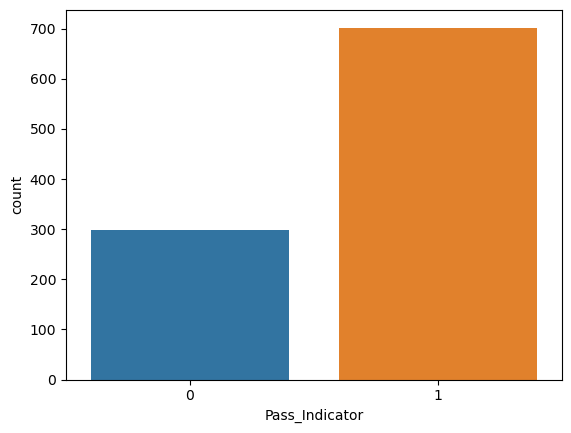

In [17]:
# data['Pass_Indicator'].value_counts().plot(kind='bar')
sns.countplot(x='Pass_Indicator',data=data)

In [18]:
data['Pass_Indicator'].value_counts()

Pass_Indicator
1    702
0    298
Name: count, dtype: int64

<Axes: xlabel='Family_Support', ylabel='count'>

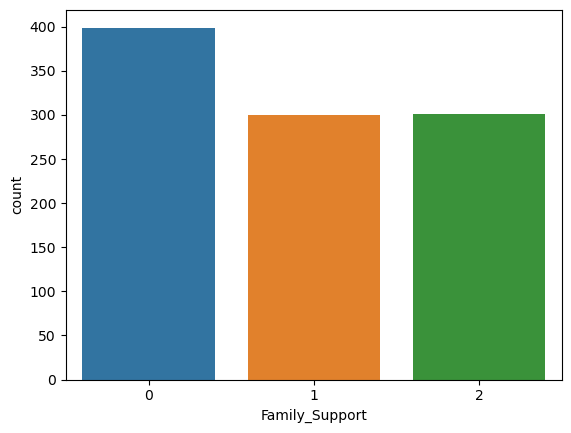

In [19]:
# data['Family_Support'].value_counts().plot(kind='bar')
sns.countplot(x='Family_Support',data=data)

In [20]:
data['Family_Support'].value_counts()

Family_Support
0    399
2    301
1    300
Name: count, dtype: int64

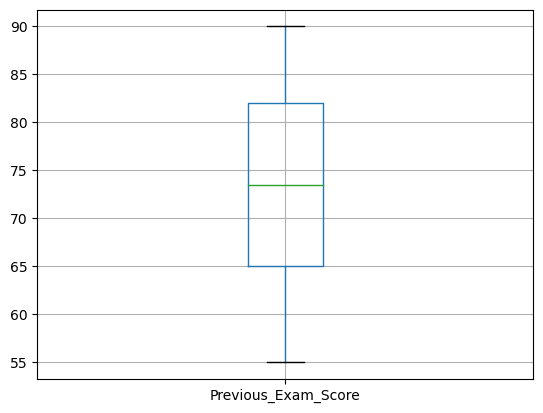

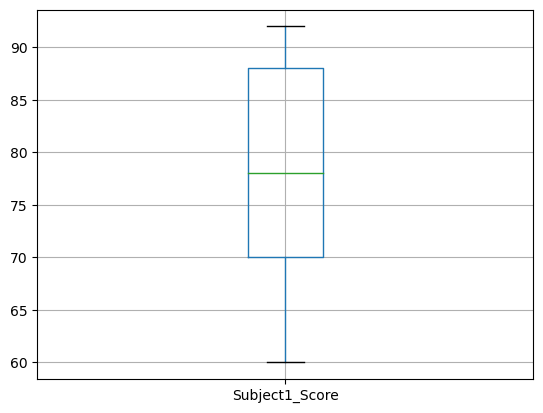

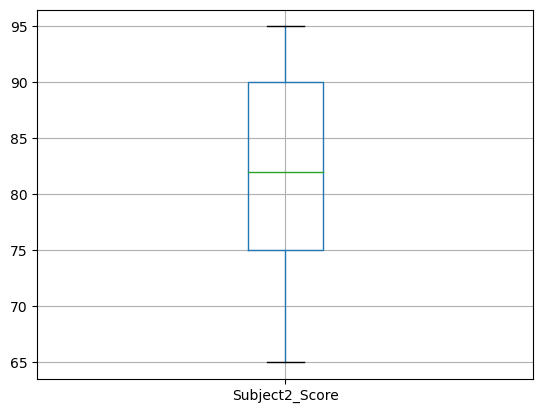

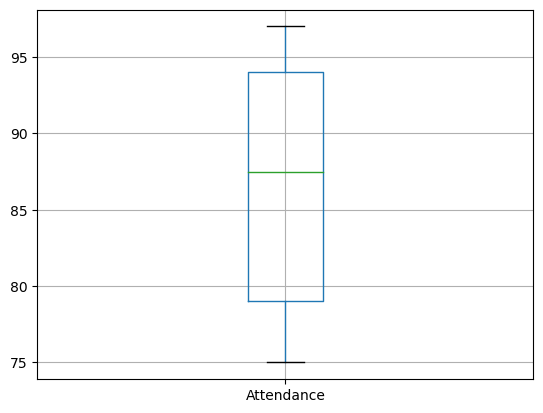

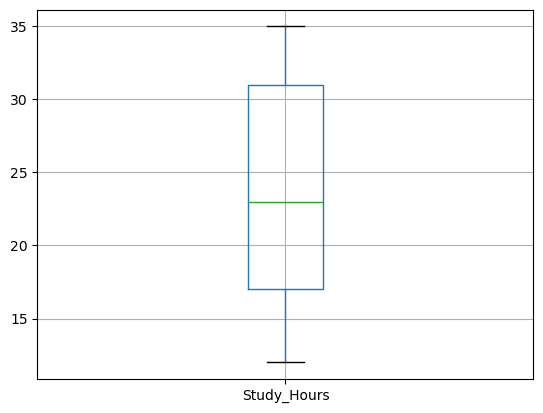

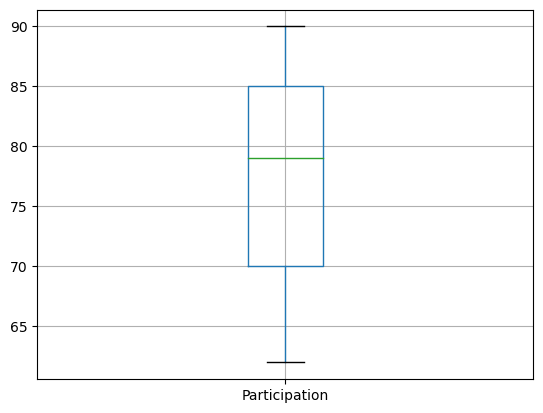

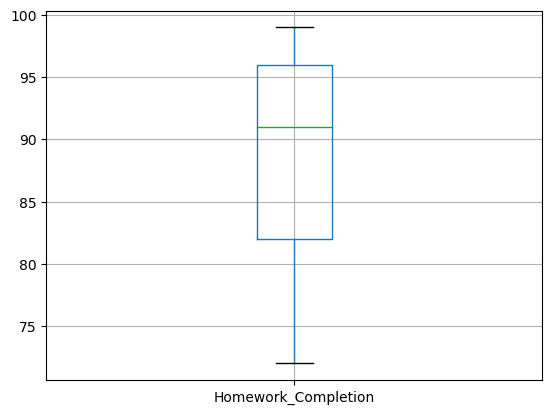

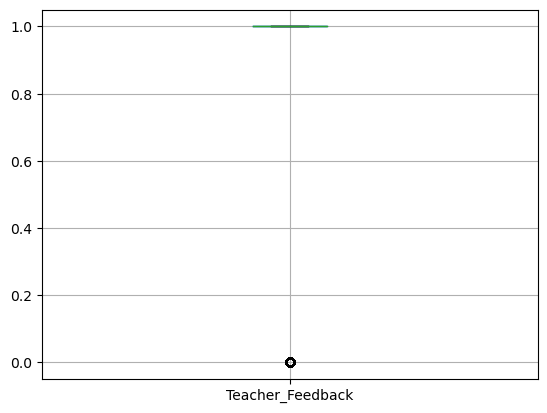

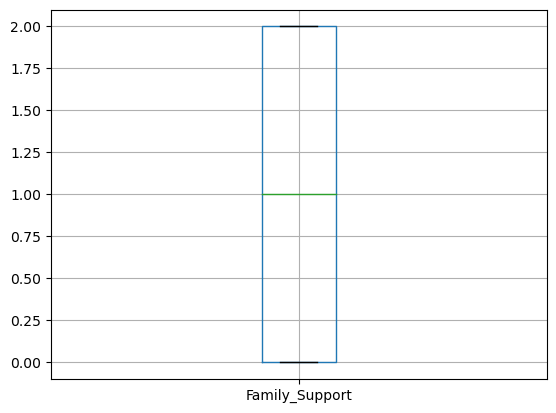

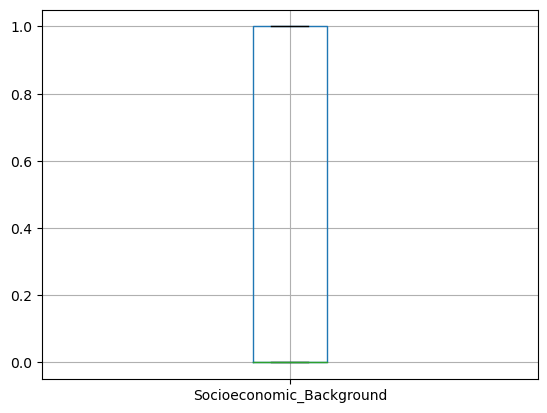

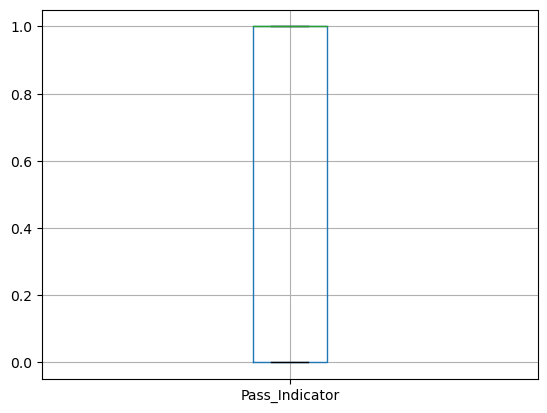

In [21]:
for i in data.columns:
  data.boxplot(column=i)
  plt.show()

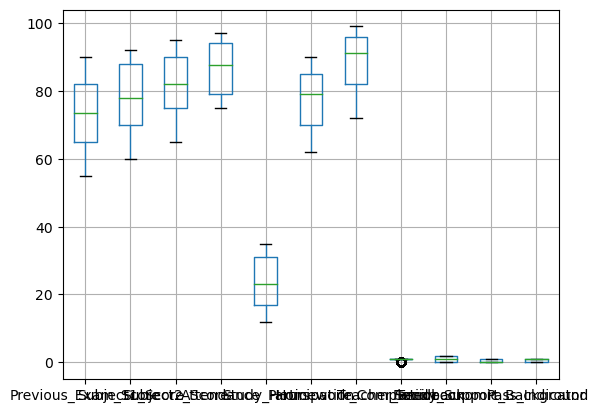

In [22]:
data.boxplot()
plt.show()

# Multivariate Analysis

<Axes: xlabel='Study_Hours', ylabel='Participation'>

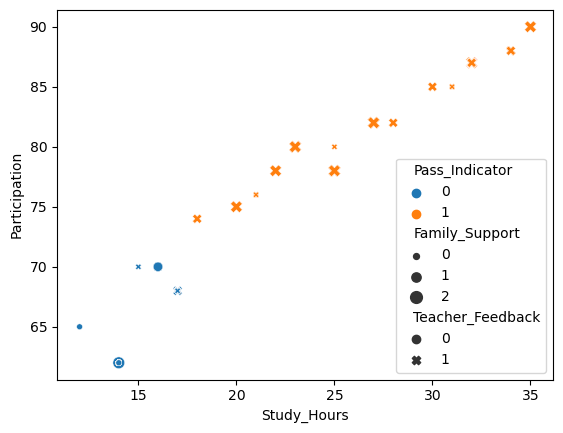

In [23]:
sns.scatterplot(data=data,x=data["Study_Hours"],y=data['Participation'],hue=data['Pass_Indicator'],style=data['Teacher_Feedback'],size=data['Family_Support'])

<Axes: xlabel='Subject1_Score', ylabel='Subject2_Score'>

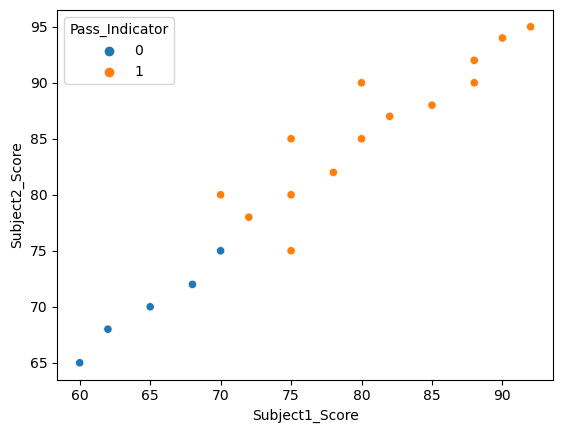

In [24]:
sns.scatterplot(data=data,x=data['Subject1_Score'],y=data['Subject2_Score'],hue='Pass_Indicator')

<Axes: xlabel='Socioeconomic_Background', ylabel='Attendance'>

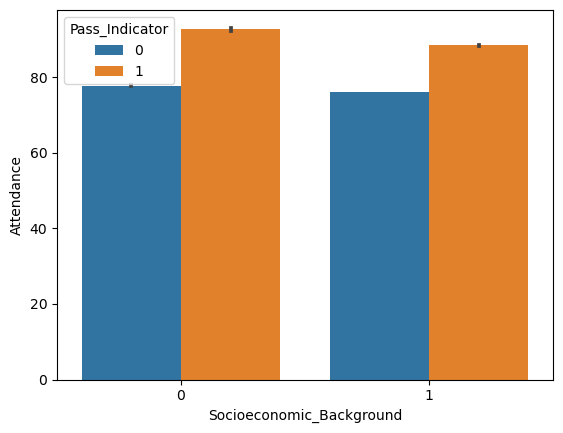

In [25]:
sns.barplot(data=data,x=data['Socioeconomic_Background'],y=data['Attendance'],hue=data['Pass_Indicator'])

<Axes: xlabel='Pass_Indicator', ylabel='Family_Support'>

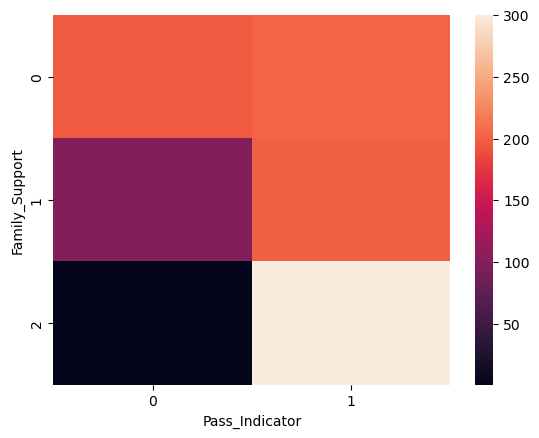

In [26]:
# Family_Support
#0-High
#2-Medium
#1-Low
sns.heatmap(pd.crosstab(data['Family_Support'],data['Pass_Indicator']))
#Pass_Indicator
#0-Fail
#1-Pass

In [27]:
data.groupby('Family_Support').mean()['Pass_Indicator']

Family_Support
0    0.506266
1    0.666667
2    0.996678
Name: Pass_Indicator, dtype: float64

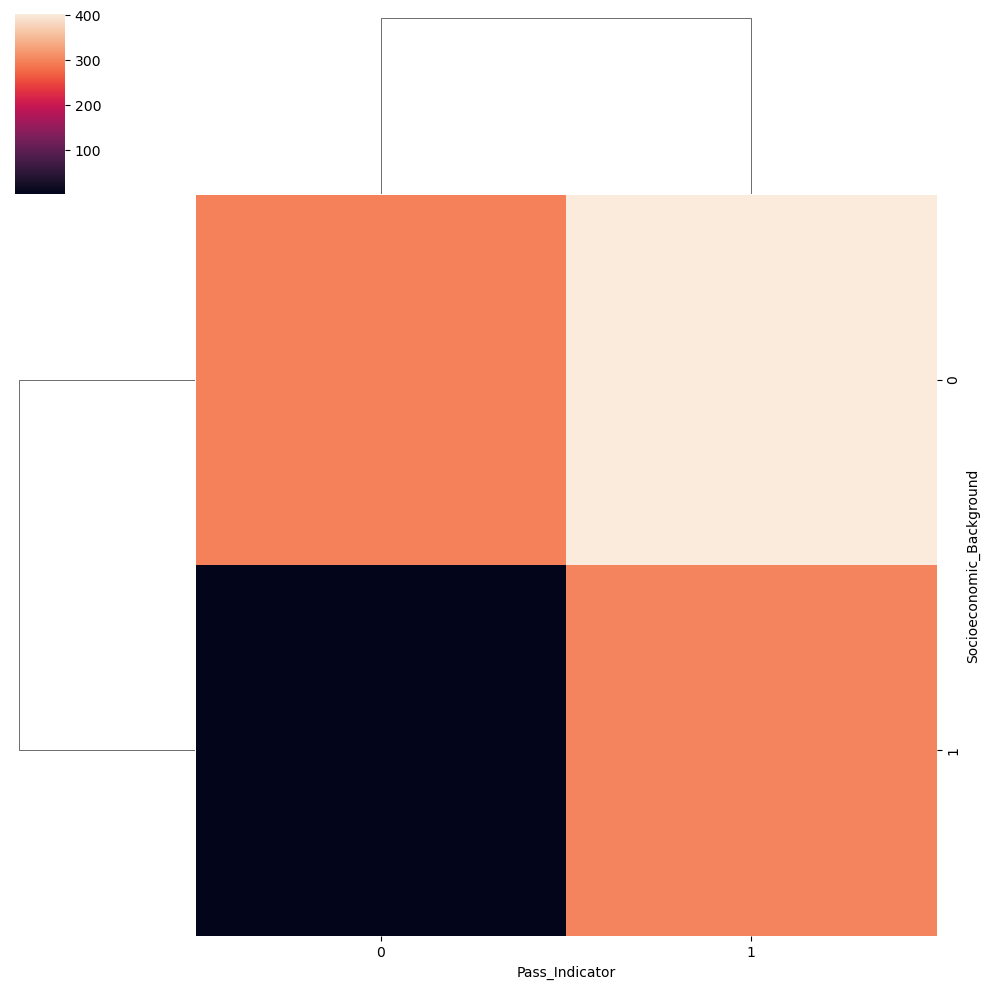

In [28]:
sns.clustermap(pd.crosstab(data['Socioeconomic_Background'],data['Pass_Indicator']))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


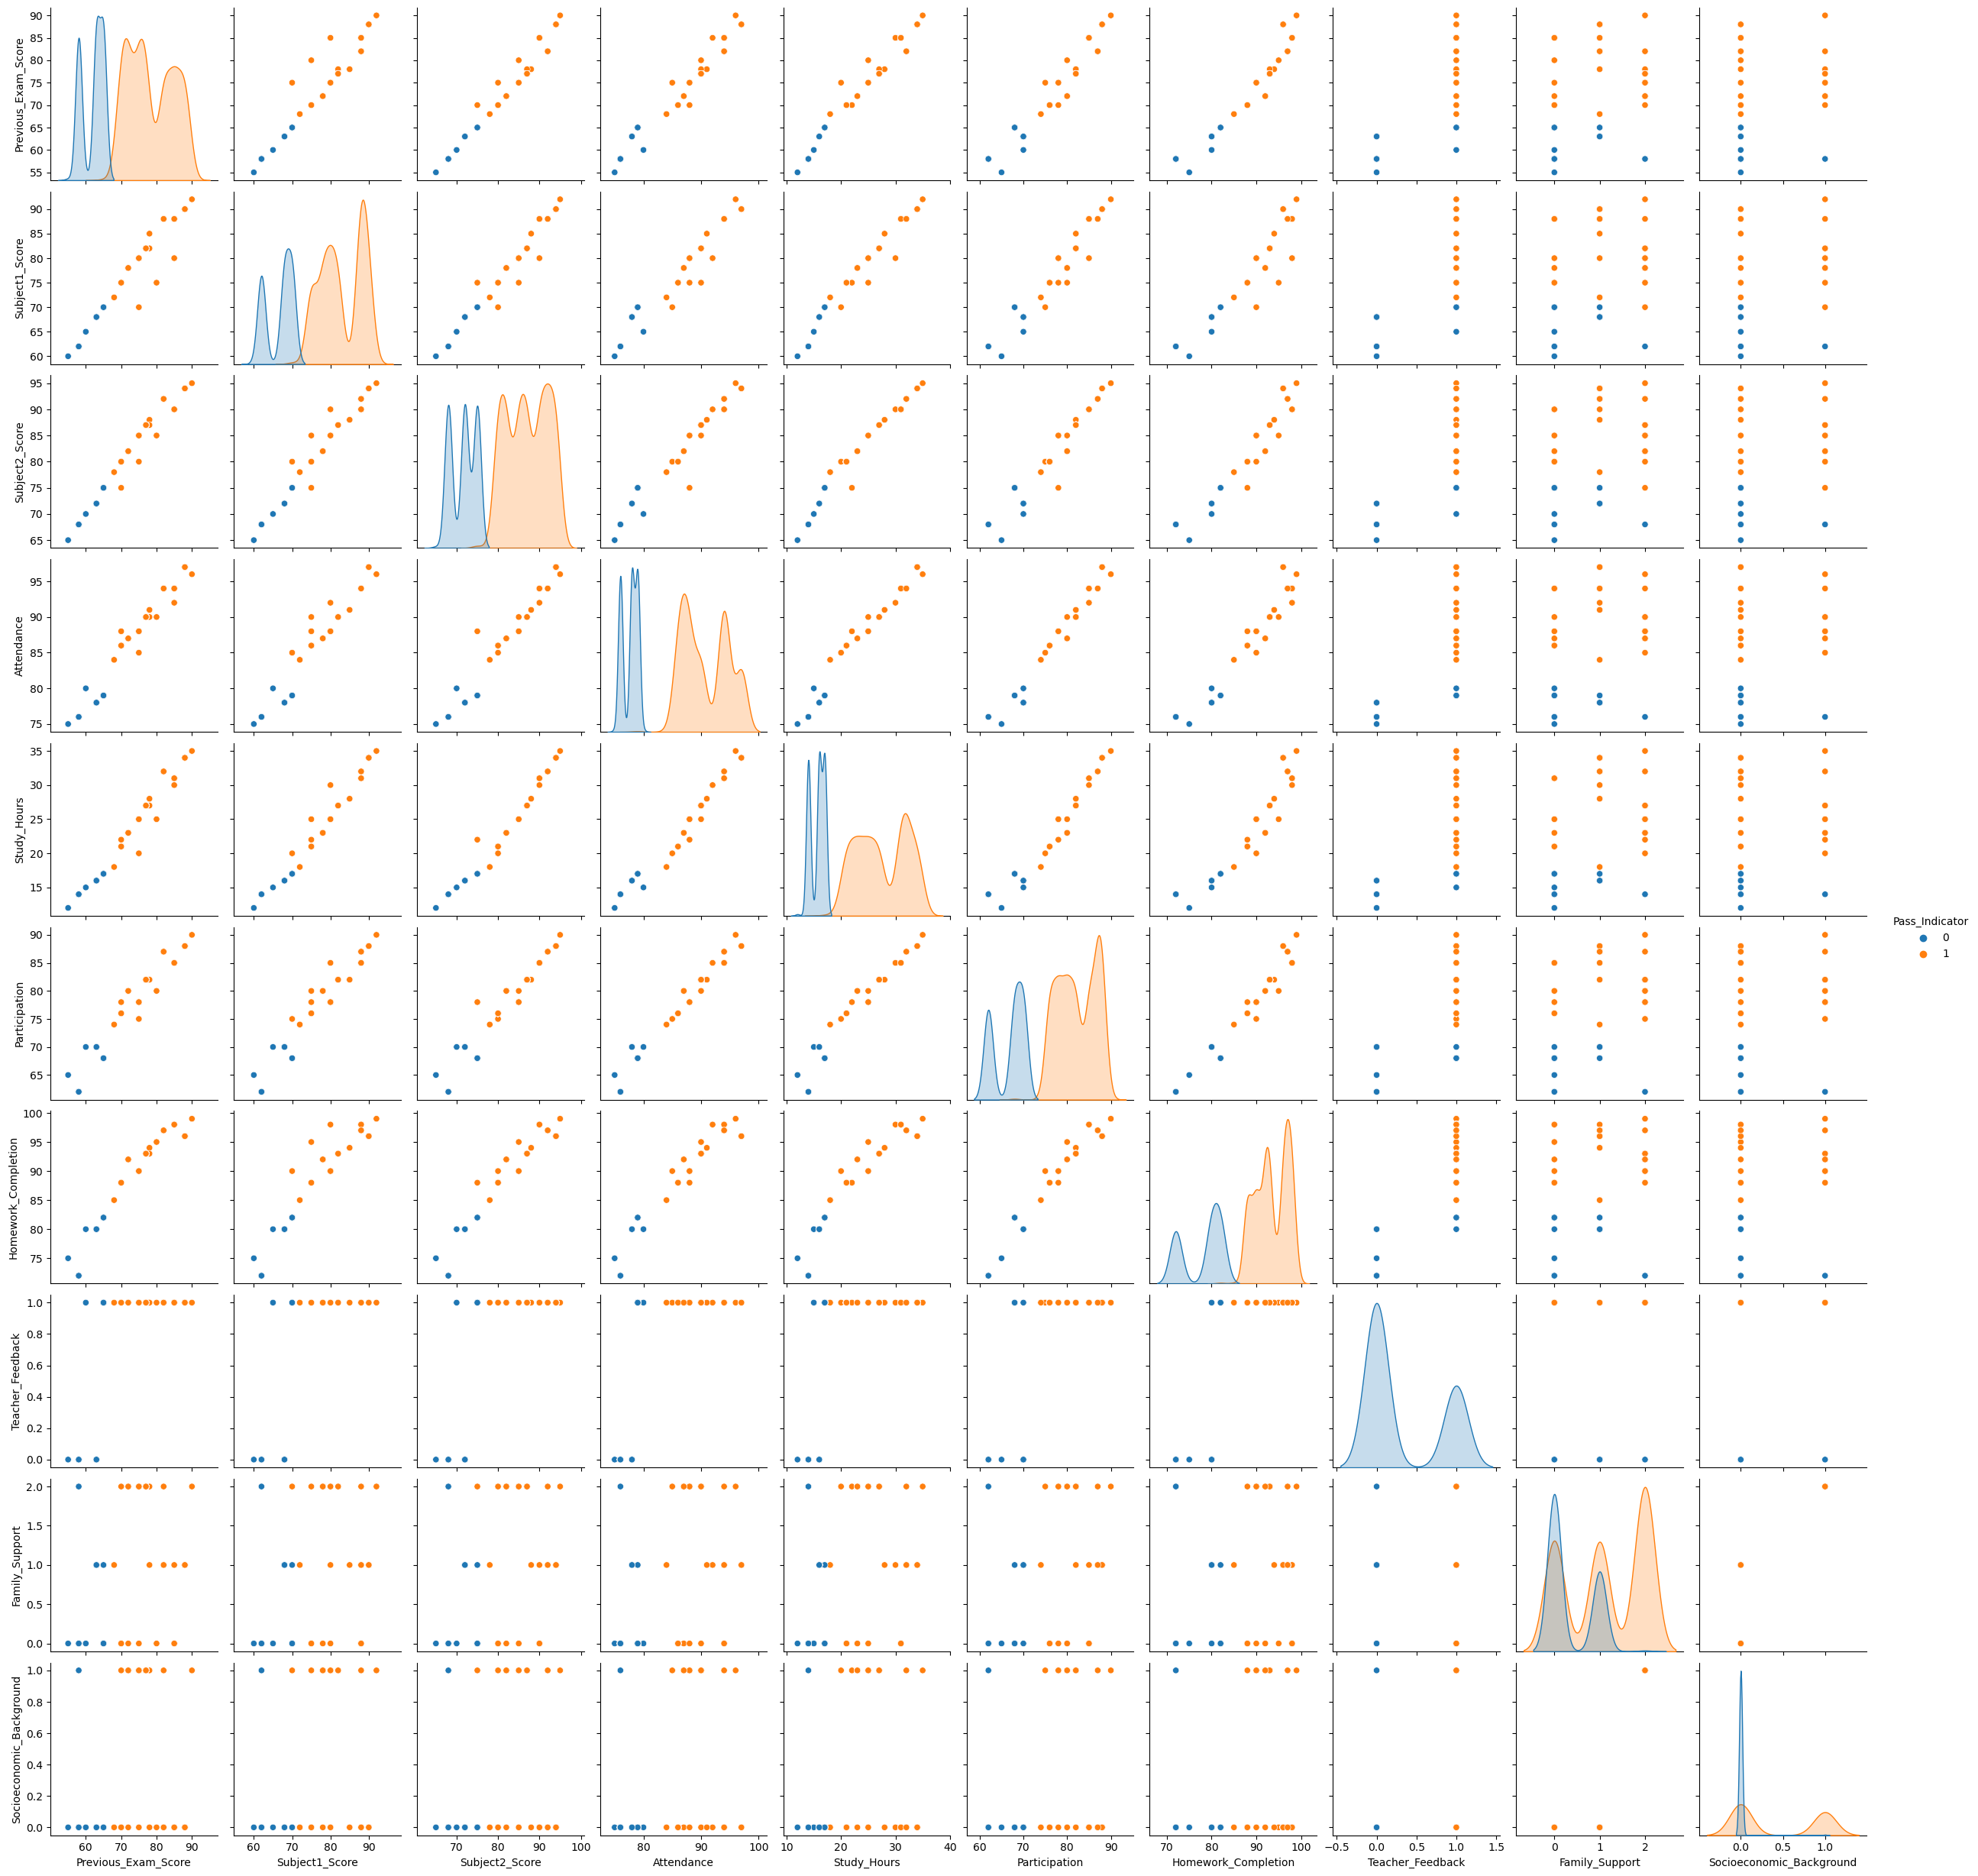

In [29]:
sns.pairplot(data,hue='Pass_Indicator')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [32]:
print(X.shape)
print(Y.shape)

(1000, 10)
(1000,)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 10)
(800,)
(200, 10)
(200,)


In [35]:
model = LogisticRegression()

In [36]:
model

LogisticRegression()

In [37]:
model.fit(X_train, Y_train)

C:\Users\ocmodels03dev\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
Y_pred = model.predict(X_test)
Y_pred.shape

(200,)

In [39]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [40]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[ 52   0]
 [  0 148]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       148

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [41]:
# import pickle
# filename = 'stu_trained_model.sav'
# pickle.dump(model, open(filename, 'wb'))

input_data=(85,80,90,92,30,85,98,1,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print("The student Passes the test")
else:
  print("The student Fails the test")

[1]
The student Passes the test


C:\Users\ocmodels03dev\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
# with open('logistic_regression_model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

In [43]:
# !pip install streamlit
# import streamlit as st

In [44]:
# import streamlit as st

In [45]:
# input_data=(85,80,90,92,30,85,98,1,1,0)
# def result_prediction(input_data):
#   input_data_as_numpy_array=np.asarray(input_data)
#   input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#   prediction=model.predict(input_data_reshaped)
#   print(prediction)

#   if (prediction[0]==1):
#     print("The student Passes the test")
#   else:
#     print("The student Fails the test")

In [46]:
# data.columns

In [47]:
# def main():
#   st.title("Result Prediction")
# #   Student_ID=st.text_input('Student_ID')
#   Previous_Exam_Score=st.text_input('Previous_Exam_Score')
#   Subject1_Score=st.text_input('Subject1_Score')
#   Subject2_Score=st.text_input('Subject2_Score')
#   Attendance=st.text_input('Attendance')
#   Study_Hours=st.text_input('Study_Hours')
#   Participation=st.text_input('Participation')
#   Homework_Completion=st.text_input('Homework_Completion')
#   Teacher_Feedback=st.text_input('Teacher_Feedback')
#   Family_Support=st.text_input('Family_Support')
#   Socioeconomic_Background=st.text_input('Socioeconomic_Background')

#   result = ''

#   if st.button('Result'):
#     result = result_prediction([ Previous_Exam_Score, Subject1_Score, Subject2_Score,Attendance, Study_Hours, Participation, Homework_Completion,Teacher_Feedback, Family_Support, Socioeconomic_Background])

#   st.success(result)


# if __name__=='__main__':
#   main()